#Predicting Overall Rating based on Players Different Stats and Comparing them with their Actual Overall rating


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##Data PreProcessing

In [2]:
df = pd.read_csv('/content/CB(1).csv')
df

,Unnamed: 0,ID,Position,Player Name,Team Name,Nationality,Height,Weight,Age,Offensive Awareness,...,Tackling,Aggression,Defensive Engagement,GK Awareness,GK Catching,GK Parrying,GK Reflexes,GK Reach,Overall Rating,Price
0,0,5518,CB,Raúl Albiol,Villarreal A,Spain,190,82,37,60,...,89,87,93,40,40,40,40,40,90,51.0
1,1,7329,CB,Sergio Ramos,Free Agents,Spain,184,82,36,59,...,91,94,84,40,40,40,40,40,91,0.0
2,2,7814,CB,Dante,OGC Nice,Brazil,189,91,39,54,...,92,87,86,40,40,40,40,40,86,10.0
3,3,7880,CB,M. Debuchy,Free Agents,France,176,76,37,63,...,85,86,86,40,40,40,40,40,83,0.0
4,4,8851,CB,G. Chiellini,Los Angeles BY,Italy,187,85,38,54,...,89,92,91,40,40,40,40,40,87,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,923,128613,CB,N. Vouilloz,Servette FC,Switzerland,184,80,21,51,...,88,85,87,40,40,40,40,40,82,3.1
924,924,128740,CB,L. Østigård,SSC Napoli,Norway,182,80,23,52,...,90,96,90,40,40,40,40,40,88,4.5
925,925,128790,CB,I. Sekigawa,Kashima Antlers,Japan,182,72,22,52,...,79,85,79,40,40,40,40,40,81,3.1
926,926,128805,CB,R. Kikuchi,Vissel Kobe,Japan,188,80,26,55,...,80,84,85,40,40,40,40,40,84,4.0


As we can see few columns are just **Arbitrary Values** which does not have any effect on Player stats.


1.   Unnamed: 0
2.   Player Name
3.   Team Name
4.   Nationality
5.   ID
6.   Position
7.   Price

So Dropping thes columns will not affect data set.





In [3]:

df = df.drop(['Unnamed: 0','Player Name', 'Team Name','Nationality','ID','Position','Price'], axis = 1)


In [4]:
df

,Height,Weight,Age,Offensive Awareness,Ball Control,Dribbling,Tight Possession,Low Pass,Lofted Pass,Finishing,...,Defensive Awareness,Tackling,Aggression,Defensive Engagement,GK Awareness,GK Catching,GK Parrying,GK Reflexes,GK Reach,Overall Rating
0,190,82,37,60,64,59,56,67,68,53,...,92,89,87,93,40,40,40,40,40,90
1,184,82,36,59,69,64,71,69,72,58,...,89,91,94,84,40,40,40,40,40,91
2,189,91,39,54,66,56,59,69,66,46,...,89,92,87,86,40,40,40,40,40,86
3,176,76,37,63,63,61,62,63,64,53,...,87,85,86,86,40,40,40,40,40,83
4,187,85,38,54,56,54,58,60,62,51,...,90,89,92,91,40,40,40,40,40,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,184,80,21,51,55,50,53,53,55,44,...,83,88,85,87,40,40,40,40,40,82
924,182,80,23,52,60,55,60,58,62,53,...,83,90,96,90,40,40,40,40,40,88
925,182,72,22,52,60,51,54,57,61,44,...,81,79,85,79,40,40,40,40,40,81
926,188,80,26,55,57,51,54,58,56,49,...,82,80,84,85,40,40,40,40,40,84


# EXPLORATORY DATA ANALYSIS

<Axes: >

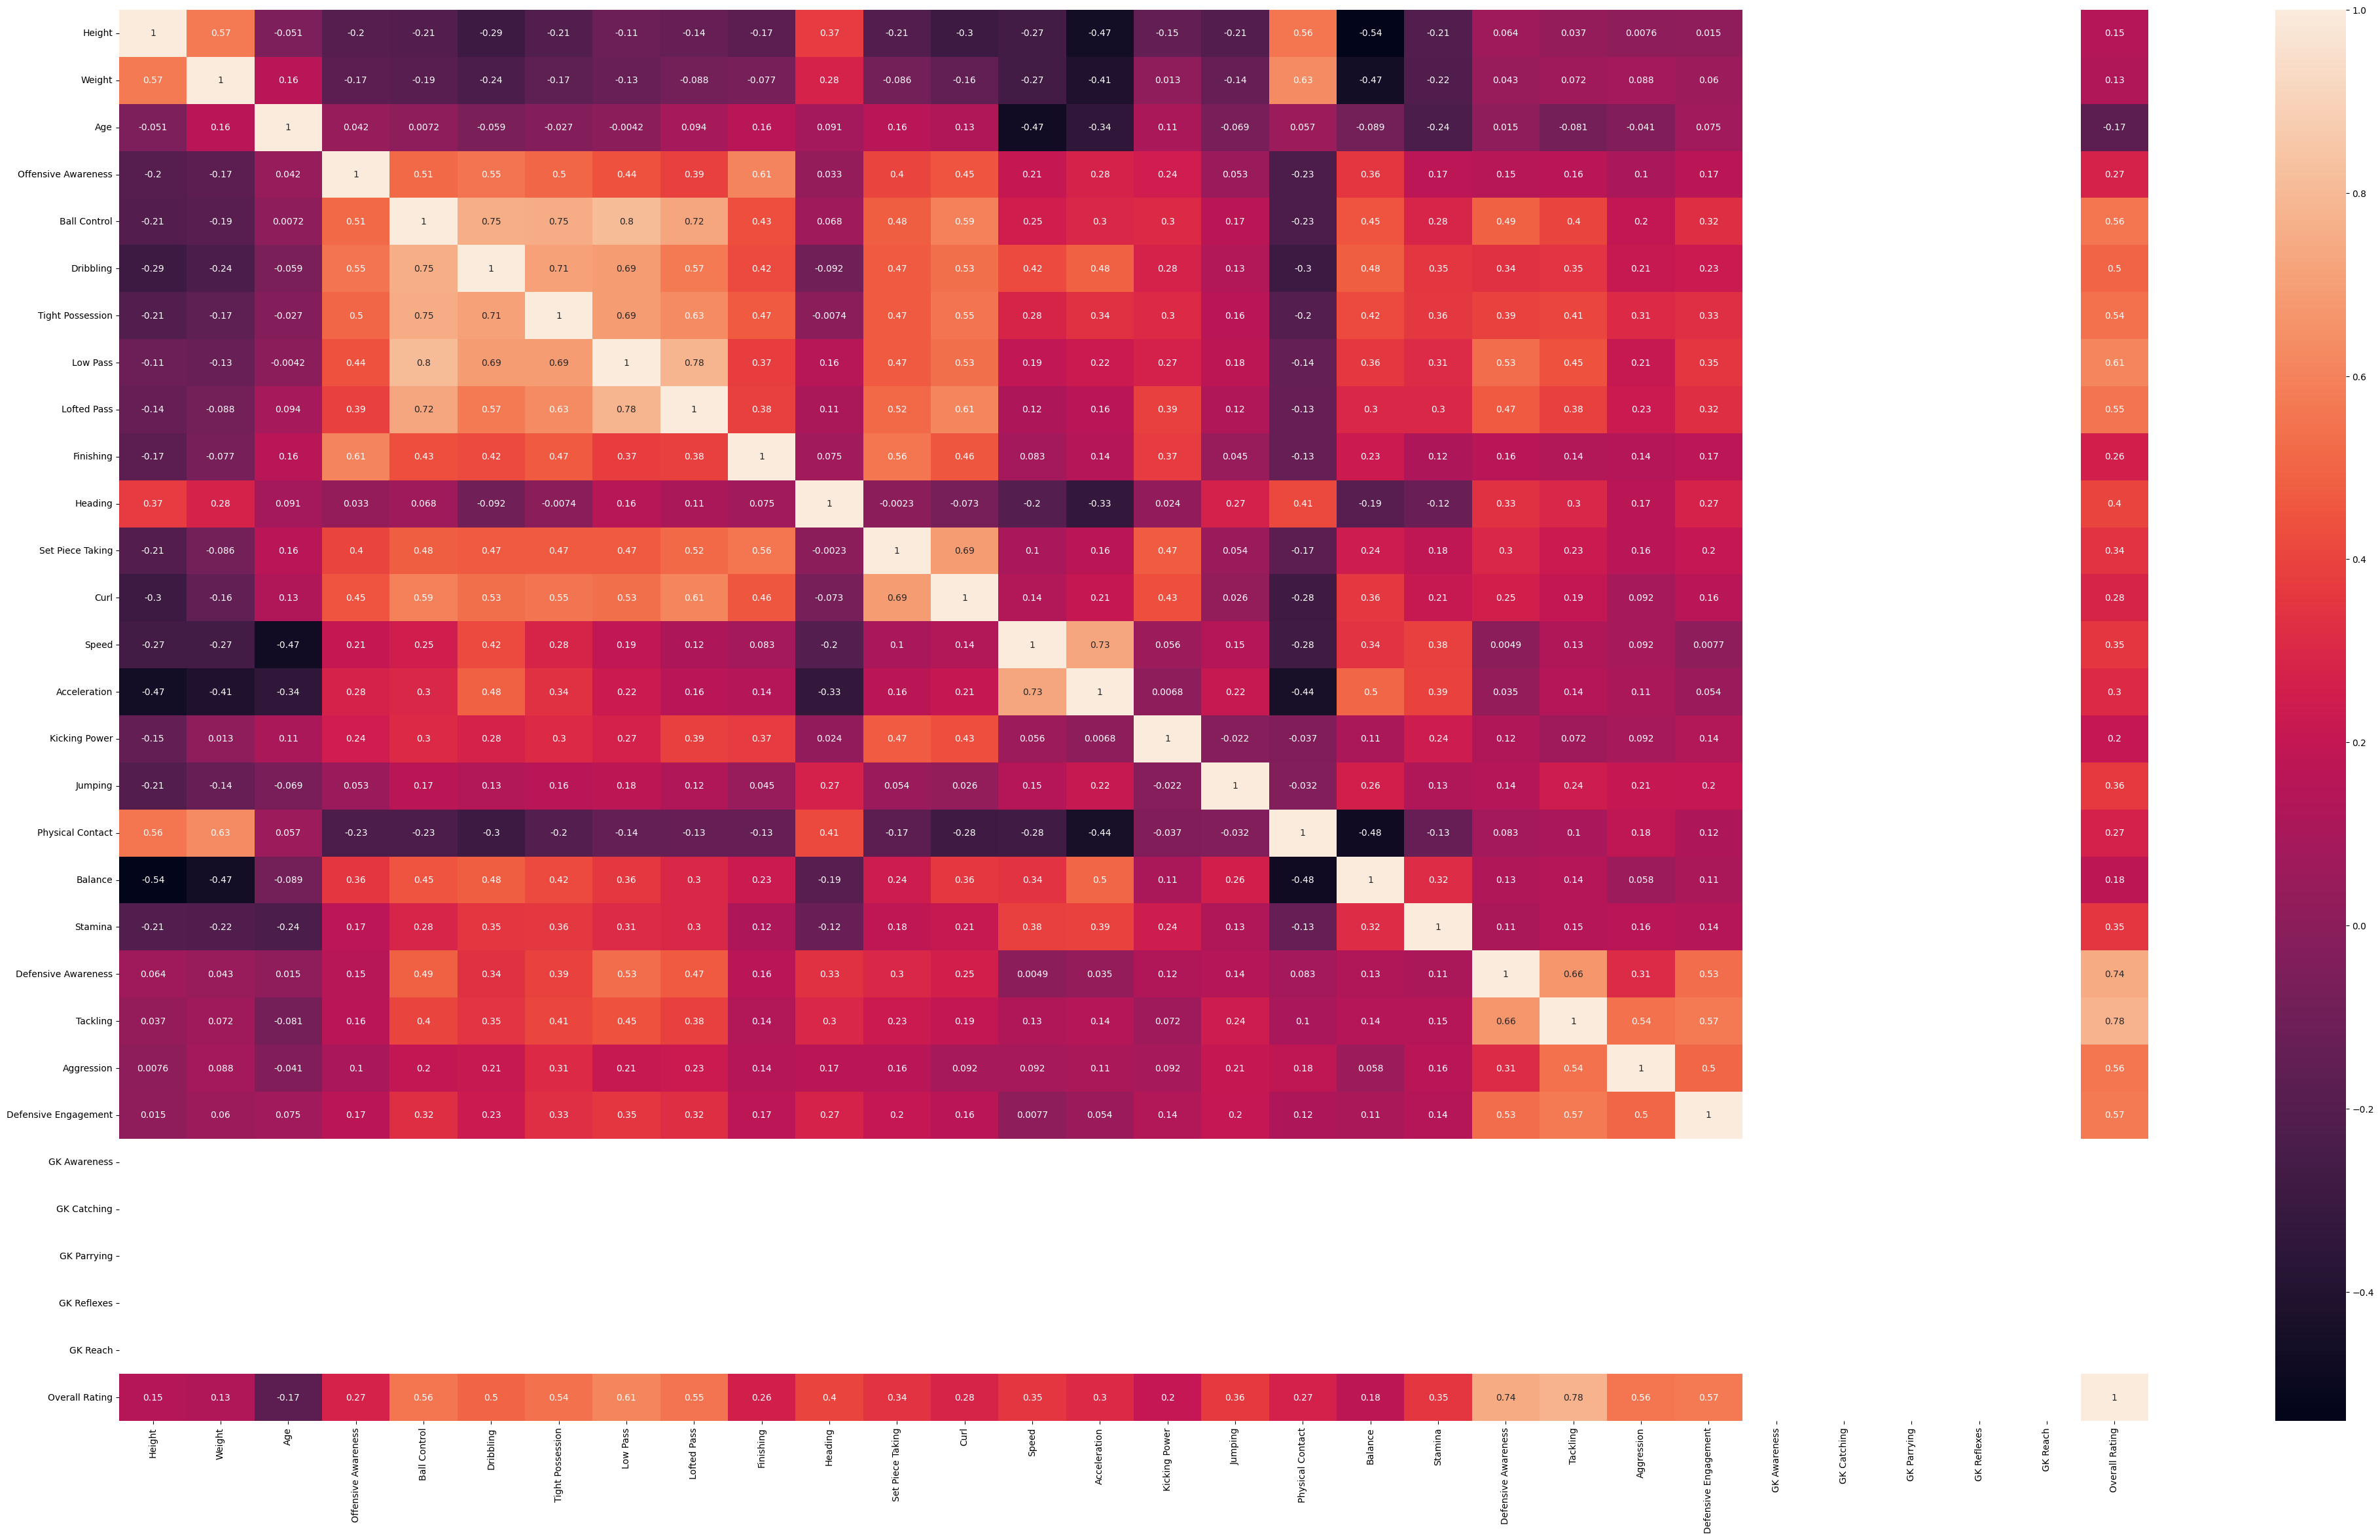

In [5]:
plt.figure(figsize=(50,28))
sns.heatmap(df.corr(), annot = True)

As we can see in the heatmap above overall rating is not correlated significantly with age, weight
and

In [6]:
df = df.drop(['Age','Weight'],axis = 1)

<Axes: xlabel='Lofted Pass', ylabel='Overall Rating'>

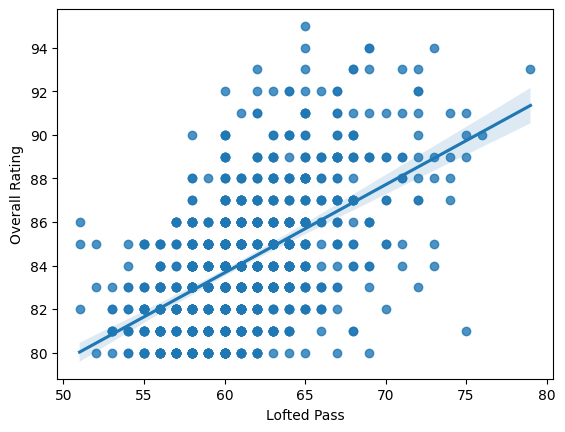

In [7]:
sns.regplot(data = df, x = 'Lofted Pass', y = 'Overall Rating')

<Axes: xlabel='Defensive Awareness', ylabel='Overall Rating'>

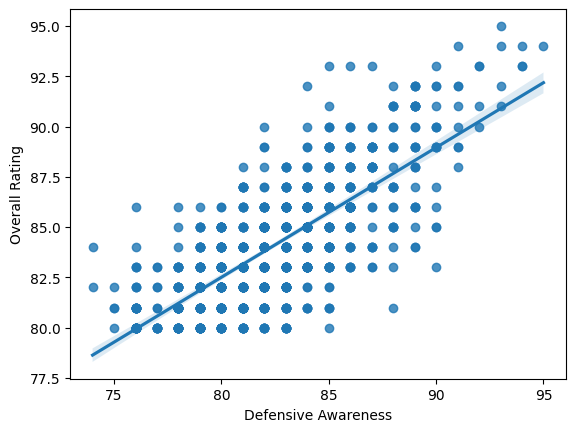

In [8]:
sns.regplot(data = df, x = 'Defensive Awareness', y = 'Overall Rating')

 lofted pass, defensive awareness  looks key stats for a CB.

##Scaling And Train Test Split

In [9]:
X = df.drop('Overall Rating', axis =1) # Removing the feature we need to predict
y =df['Overall Rating']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
X_train= scaler.fit_transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

In [16]:
X_train.shape

(742, 27)

In [17]:
X_test.shape

(186, 27)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [19]:
model = Sequential()

model.add(Dense(27,activation='relu'))
model.add(Dense(27,activation='relu'))
model.add(Dense(27,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [20]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=8,epochs=200)

Epoch 1/200
93/93 [==============================] - 7s 5ms/step - loss: 6528.7095 - val_loss: 4550.4722
Epoch 2/200
93/93 [==============================] - 0s 4ms/step - loss: 1062.9591 - val_loss: 88.7618
Epoch 3/200
93/93 [==============================] - 0s 4ms/step - loss: 101.1681 - val_loss: 78.6777
Epoch 4/200
93/93 [==============================] - 0s 4ms/step - loss: 92.0420 - val_loss: 71.1207
Epoch 5/200
93/93 [==============================] - 0s 4ms/step - loss: 81.6124 - val_loss: 61.5993
Epoch 6/200
93/93 [==============================] - 0s 4ms/step - loss: 72.9183 - val_loss: 56.9982
Epoch 7/200
93/93 [==============================] - 0s 4ms/step - loss: 63.7890 - val_loss: 53.9487
Epoch 8/200
93/93 [==============================] - 0s 4ms/step - loss: 54.9807 - val_loss: 41.8045
Epoch 9/200
93/93 [==============================] - 0s 4ms/step - loss: 47.0290 - val_loss: 34.5894
Epoch 10/200
93/93 [==============================] - 0s 4ms/step - loss: 39.8626 - 

In [21]:
model.save('CB_stats_predictor.h5')

## Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error
X_test
predictions = model.predict(X_test)
mean_absolute_error(y_test,predictions)